In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy import stats
from sklearn.preprocessing import MinMaxScaler

In [4]:
df_redwine = pd.read_csv('winequality-red.csv')

display(df_redwine)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


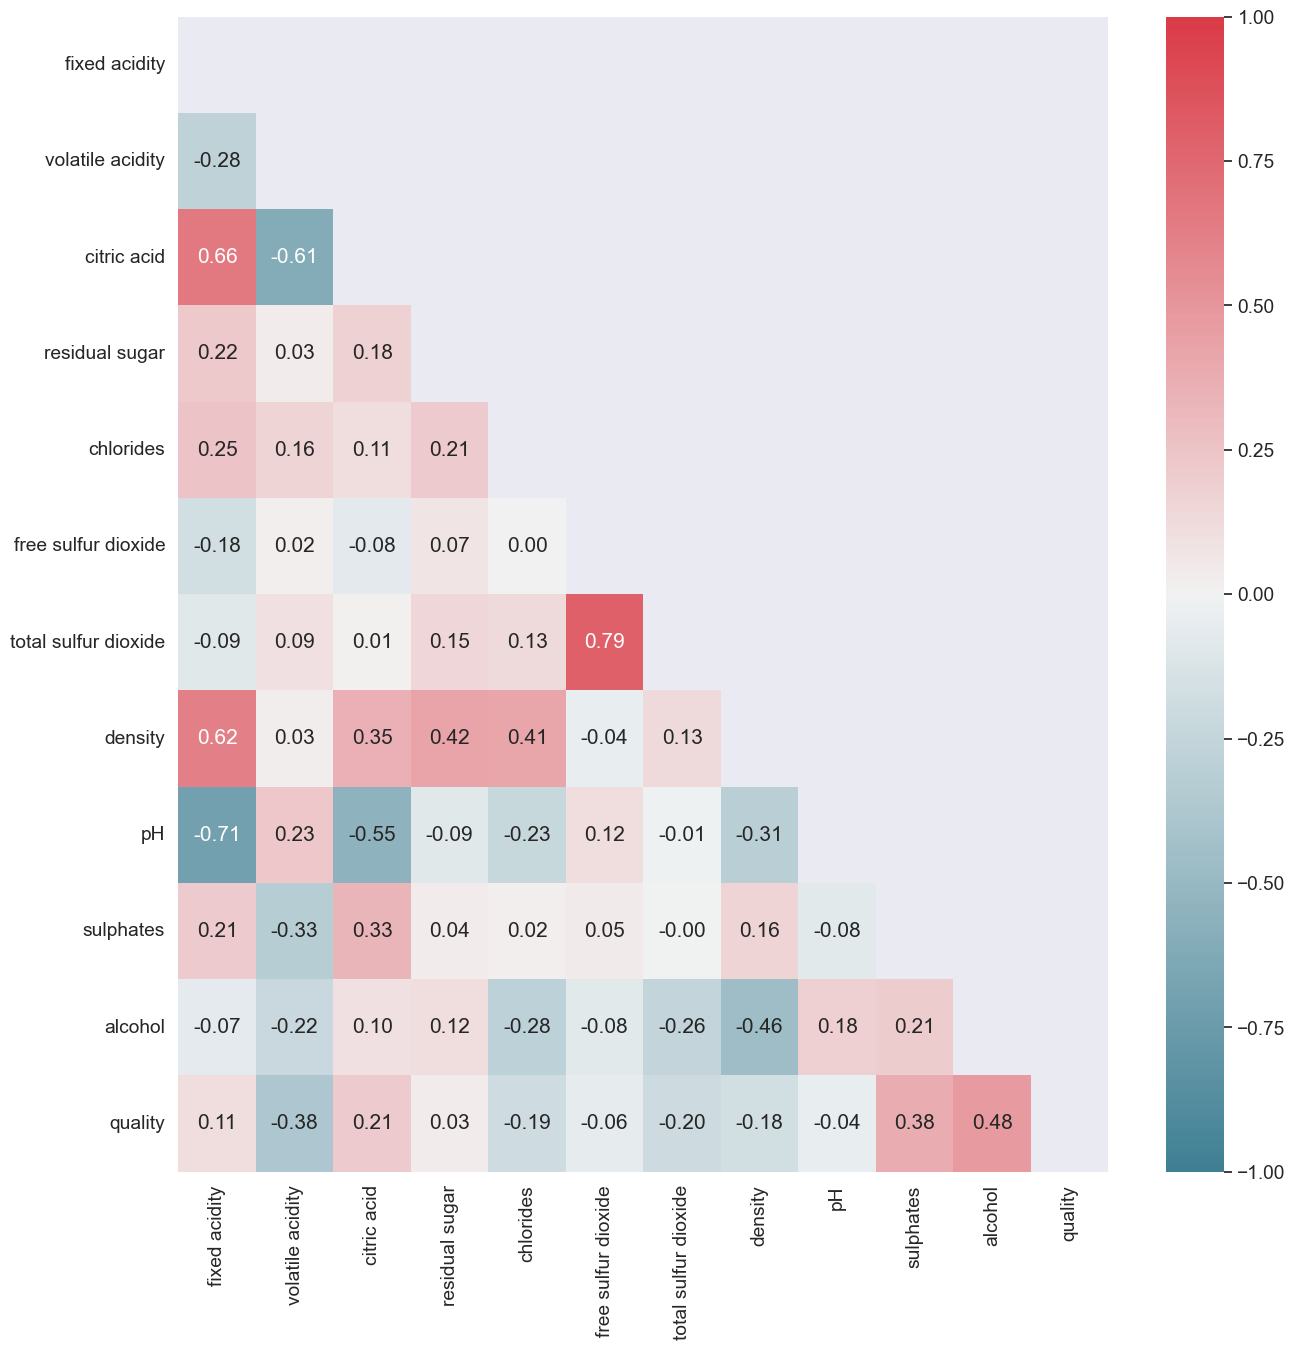

In [5]:
def heatmap(df, fig_size=15):
    #Create a heatmap
    corr = df.corr(method="spearman")
    mask = np.triu(np.ones_like(corr, dtype=bool))
    sns.set(font_scale=fig_size / len(corr.columns))
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    plot, ax = plt.subplots(figsize=(fig_size, fig_size))
    sns.heatmap(corr, vmin=-1, vmax=1, mask=mask, cmap=cmap, annot=True, fmt='.2f')

    for axis in [ax.xaxis, ax.yaxis]:
        axis.set(ticks=np.arange(0.5, len(corr.columns)), ticklabels=corr.columns)

    return plt

plot = heatmap(df_redwine)

In [6]:
from scipy.stats import spearmanr

betterwine = spearmanr(a=df_redwine['quality'], b=df_redwine['alcohol'])

print(betterwine)

SignificanceResult(statistic=0.4785316874702435, pvalue=2.7268377398472646e-92)


# Representing the raw data

In [7]:
print(df_redwine.columns)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


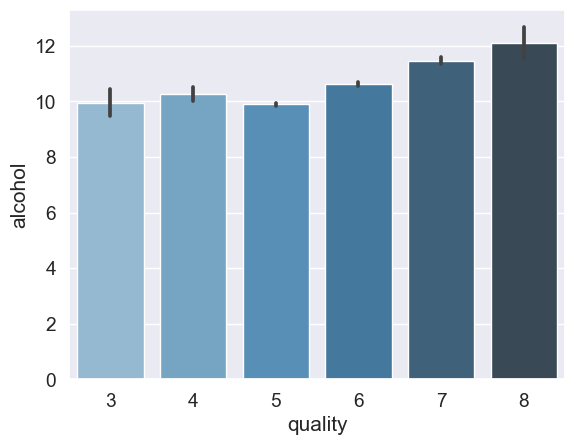

In [8]:
omg = sns.barplot(x="quality", y="alcohol", data=df_redwine, palette="Blues_d")

In [9]:
q = 'quality'
a = 'alcohol'

c:\Users\jbs\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 50.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\jbs\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 21.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='quality', ylabel='alcohol'>

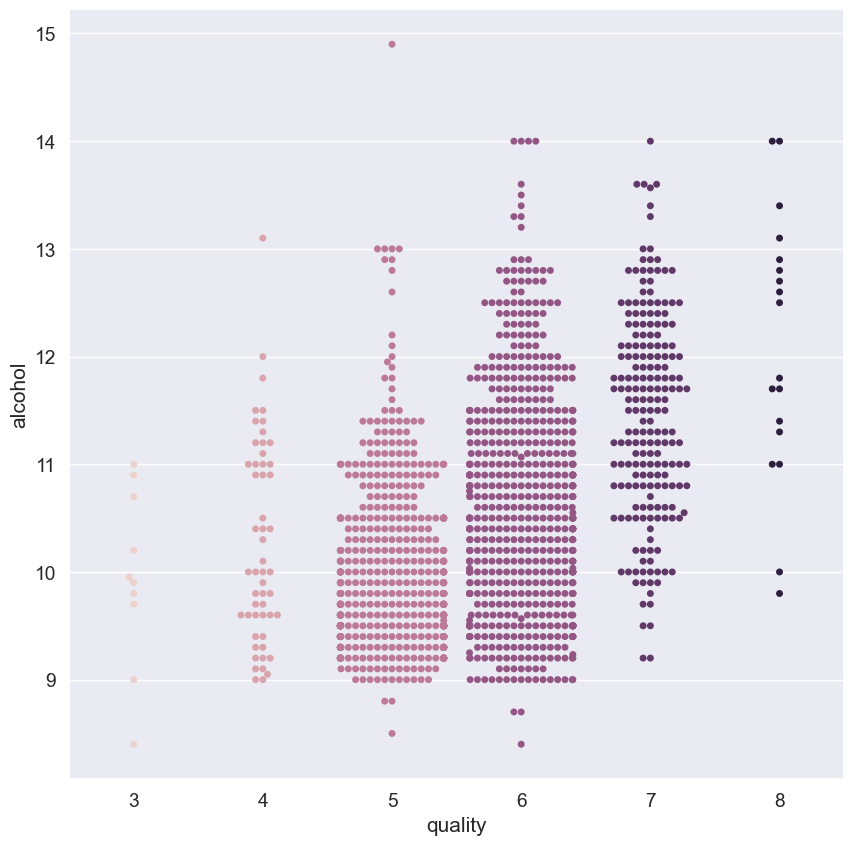

In [10]:
#Swarmplot
fig, ax = plt.subplots(figsize=(10,10))

sns.swarmplot(data=df_redwine, x=q, y=a, hue=q, size=5, legend=False)

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

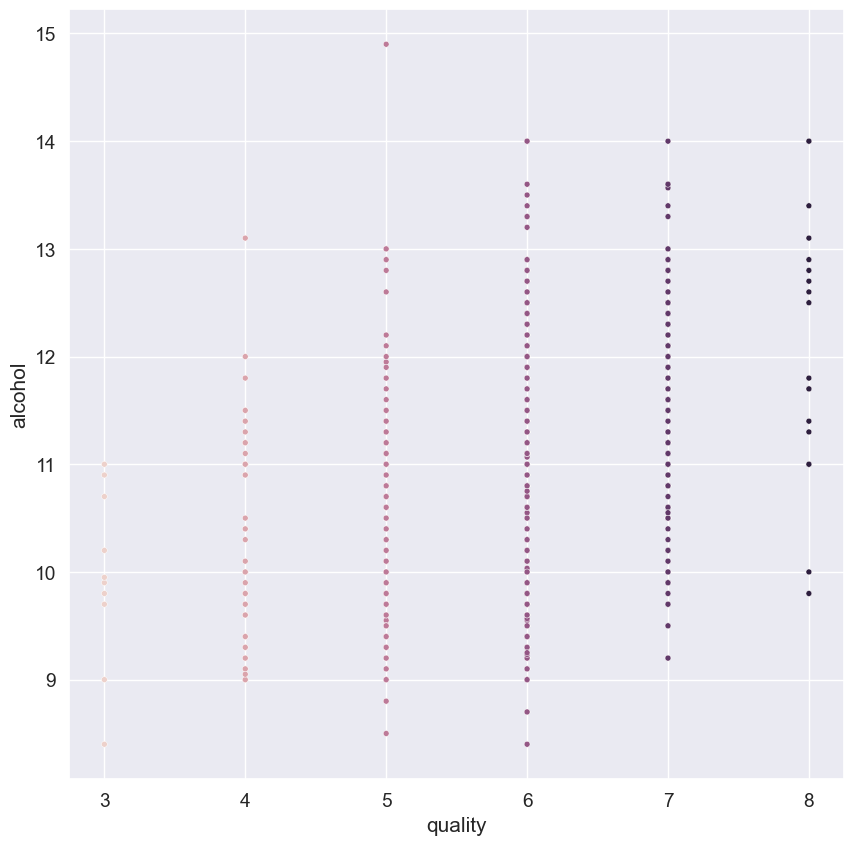

In [11]:
#Swarmplot
fig, ax = plt.subplots(figsize=(10,10))

sns.scatterplot(data=df_redwine, x=q, y=a, hue=q, size=5, legend=False)

# Trimmet Gennemsnit

In [12]:
print("Almindeligt gennemsnit")
print(df_redwine.mean())

print("==" *17)

print("Trimmet gennemsnit")
print(scipy.stats.trim_mean(a=df_redwine, proportiontocut=0.05))

Almindeligt gennemsnit
fixed acidity            8.319637
volatile acidity         0.527821
citric acid              0.270976
residual sugar           2.538806
chlorides                0.087467
free sulfur dioxide     15.874922
total sulfur dioxide    46.467792
density                  0.996747
pH                       3.311113
sulphates                0.658149
alcohol                 10.422983
quality                  5.636023
dtype: float64
Trimmet gennemsnit
[ 8.22248439  0.52053435  0.26359473  2.33171409  0.08097363 15.05100625
 43.58848022  0.99674212  3.30984733  0.64276891 10.35678927  5.63428175]


# Z-score

In [13]:
treshhold = 3
z = np.abs(stats.zscore(df_redwine))
df_z = df_redwine[(z < 3).all(axis=1)]
print(df_redwine.shape)
print("=" * 12 + "Difference" + "=" * 12)
print(df_z.shape)

(1599, 12)
============Difference============
(1451, 12)


c:\Users\jbs\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 39.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\jbs\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 8.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='quality', ylabel='alcohol'>

c:\Users\jbs\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 43.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\jbs\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 12.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


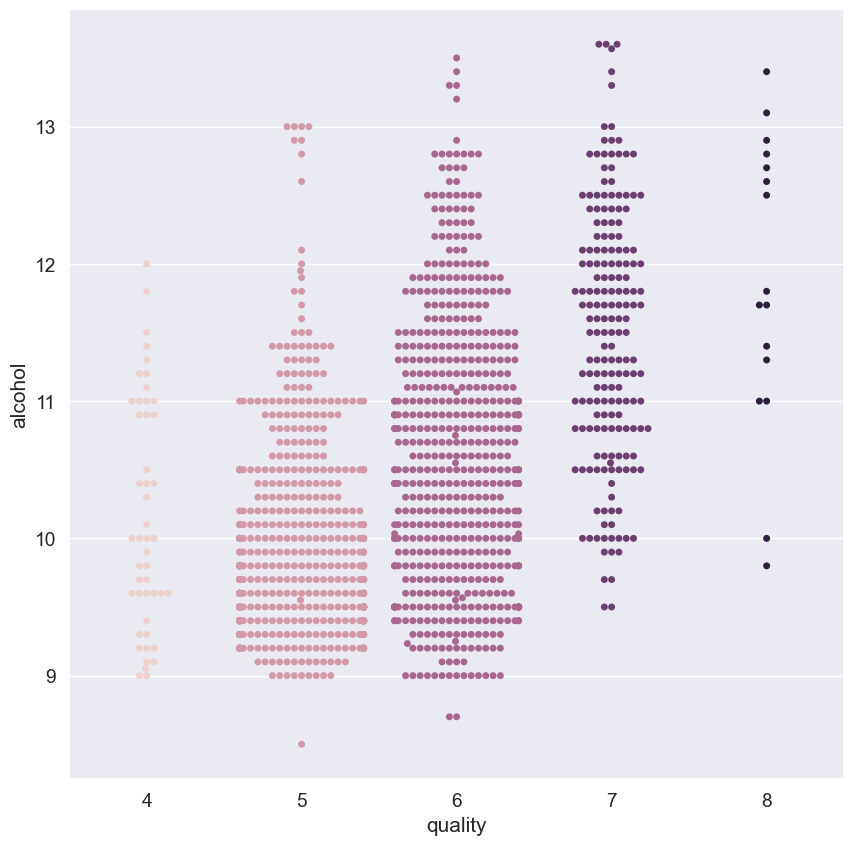

In [14]:
#Swarmplot
fig, ax = plt.subplots(figsize=(10,10))

sns.swarmplot(data=df_z, x=q, y=a, hue=q, size=5, legend=False)

# IQR

In [15]:
Q1 = df_redwine.quantile(0.25)
Q3 = df_redwine.quantile(0.75)
IQR = Q3 - Q1

Q1_z = df_z.quantile(0.25)
Q3_z = df_z.quantile(0.75)
IQR_z = Q3_z - Q1_z

iqr_df = df_redwine[~((df_redwine < (Q1 - 1.5 * IQR)) | 
                      (df_redwine > (Q3 + 1.5 * IQR))).any(axis=1)]


iqr_df_withZ = df_z[~((df_z < (Q1_z - 1.5 * IQR_z)) | 
                      (df_z > (Q3_z + 1.5 * IQR_z))).any(axis=1)]

print(df_redwine.shape)
print(iqr_df.shape)
print(iqr_df_withZ.shape)


(1599, 12)
(1179, 12)
(1142, 12)


c:\Users\jbs\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 25.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='quality', ylabel='alcohol'>

c:\Users\jbs\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 31.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


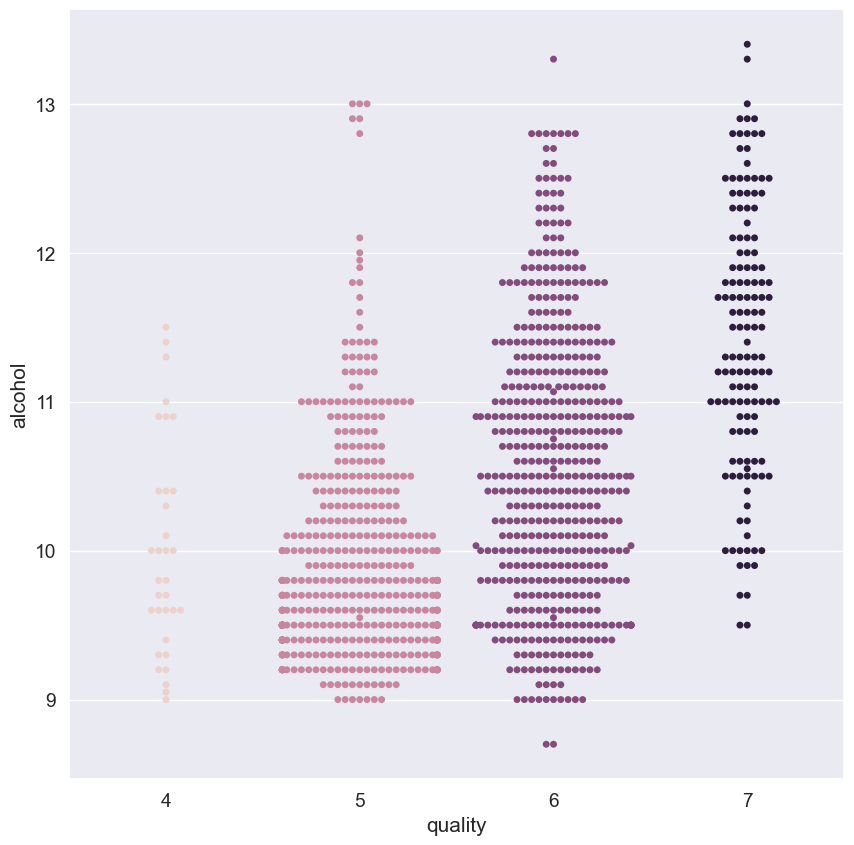

In [16]:
#Swarmplot
fig, ax = plt.subplots(figsize=(10,10))

sns.swarmplot(data=iqr_df, x=q, y=a, hue=q, size=5, legend=False)

c:\Users\jbs\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 22.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='quality', ylabel='alcohol'>

c:\Users\jbs\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 29.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


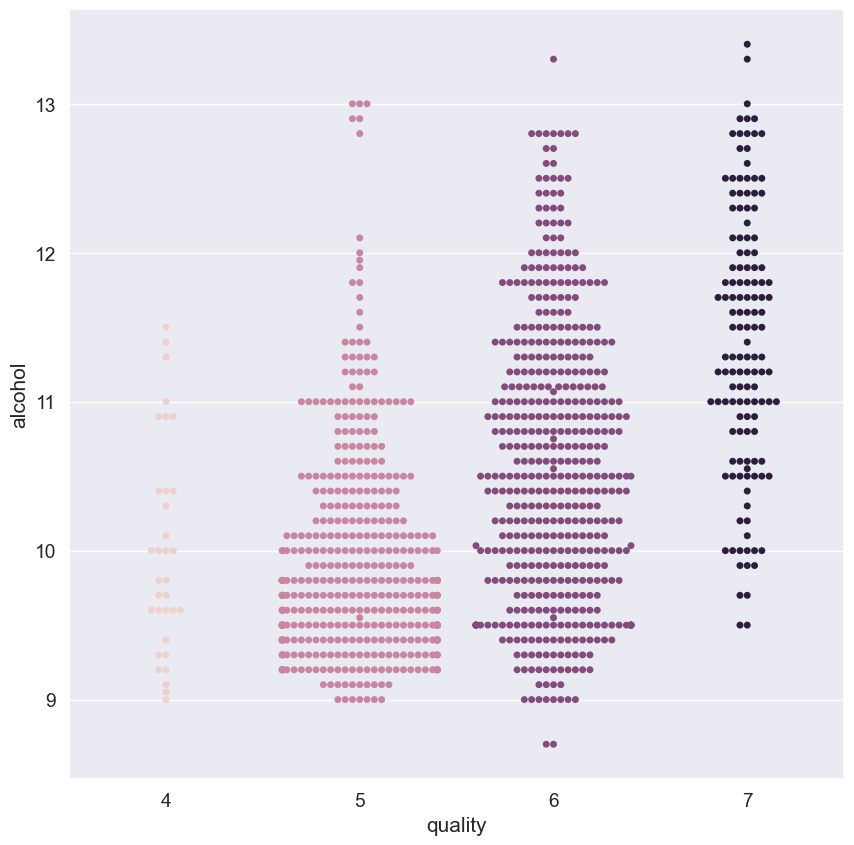

In [17]:
#Swarmplot
fig, ax = plt.subplots(figsize=(10,10))

sns.swarmplot(data=iqr_df_withZ, x=q, y=a, hue=q, size=5, legend=False)